# Лабораторная работа №5. Визуализация данных

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


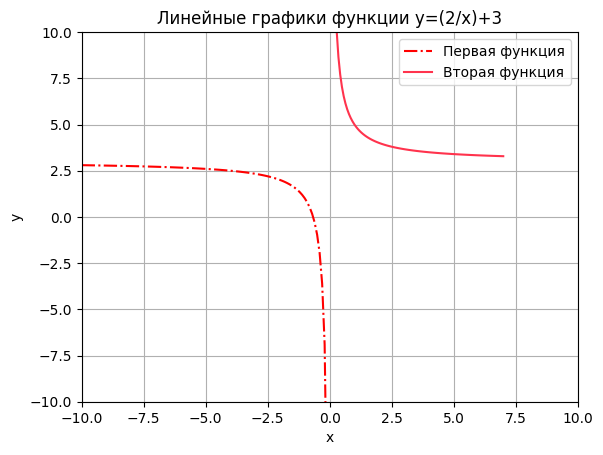

In [12]:
fig = plt.figure() # Определяет окно в котором всё будет делаться
ax = plt.axes() # Axes - сама область координат

x = np.linspace(-10, 0, 100) # Определяется область значений
x1 = np.linspace(0, 7, 100)
x = x[x != 0] # Исключаем 0
x1 = x1[x1 != 0]

ax.plot(x, (2/x) + 3, '-.r', label = "Первая функция") # Строим функции
ax.plot(x1, (2/x1) + 3, color = (1.0,0.2,0.3), label = "Вторая функция")
ax.set_xlim(-10, 10) # Выставляем пределы по x и y
ax.set_ylim(-10, 10)
ax.set_xlabel('x') # Подписываем оси x и y
ax.set_ylabel('y')
ax.legend()

ax.set_title('Линейные графики функции y=(2/x)+3') # Подписываем заголовок
ax.grid()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возраcт пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен иметь подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

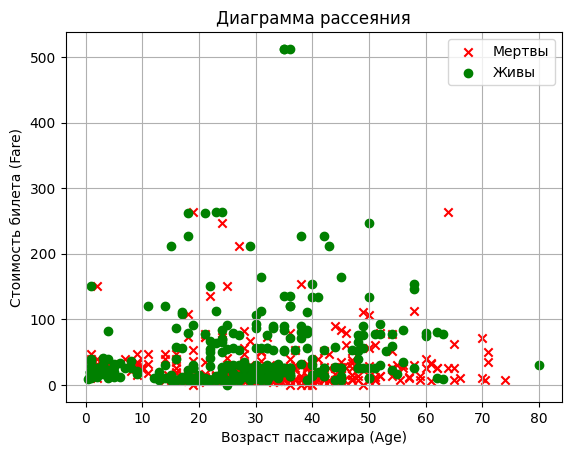

In [26]:
import pandas as pd

passengers = pd.read_csv( 'titanic.csv', index_col = 'PassengerId')

passengers_dead = passengers[passengers['Survived'] == 0]
passengers_alive = passengers[passengers['Survived'] == 1]

plt.scatter(passengers_dead['Age'], passengers_dead['Fare'], color = 'red', marker = 'x', label = "Мертвы")
plt.scatter(passengers_alive['Age'], passengers_alive['Fare'], color = 'green', marker = 'o', label = "Живы")

plt.xlabel('Возраст пассажира (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния')
plt.legend()

plt.grid(True)
plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

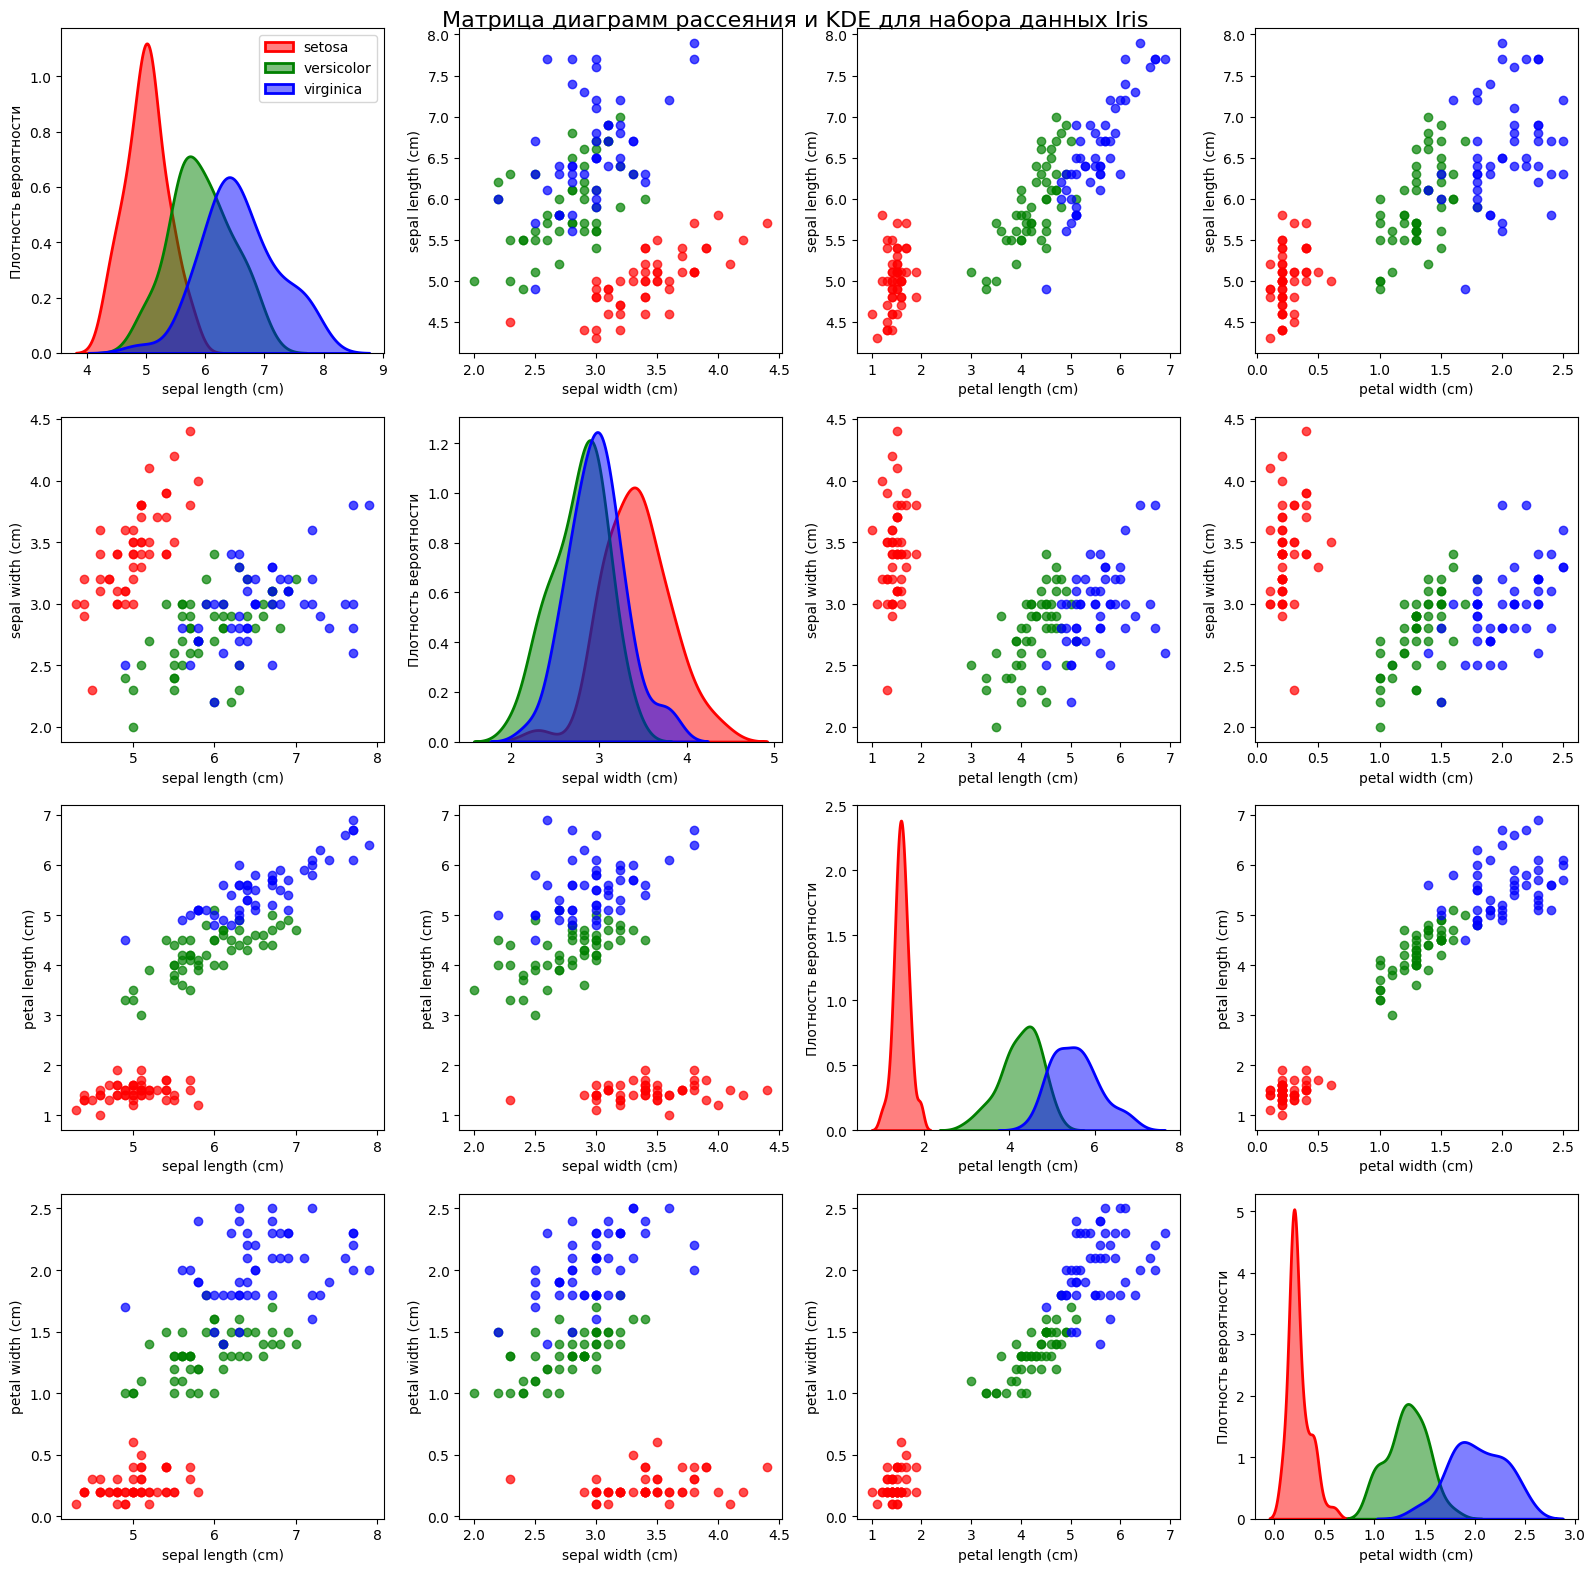

In [30]:
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle("Матрица диаграмм рассеяния и KDE для набора данных Iris", fontsize=16)

colors = ["red", "green", "blue"]

for i in range(4):
    for j in range(4):
        if i == j:

            for target in range(3):
                sns.kdeplot(X[y == target, i], ax=axes[i, j],
                           color=colors[target], label=target_names[target],
                           fill=True, alpha=0.5, linewidth=2)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel("Плотность вероятности")
        else:

            for target in range(3):
                axes[i, j].scatter(X[y == target, j], X[y == target, i],
                                  c=colors[target], alpha=0.7, label=target_names[target])
            axes[i, j].set_xlabel(feature_names[j])
            axes[i, j].set_ylabel(feature_names[i])
        if i == 0 and j == 0:
            axes[i, j].legend()

plt.tight_layout()
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

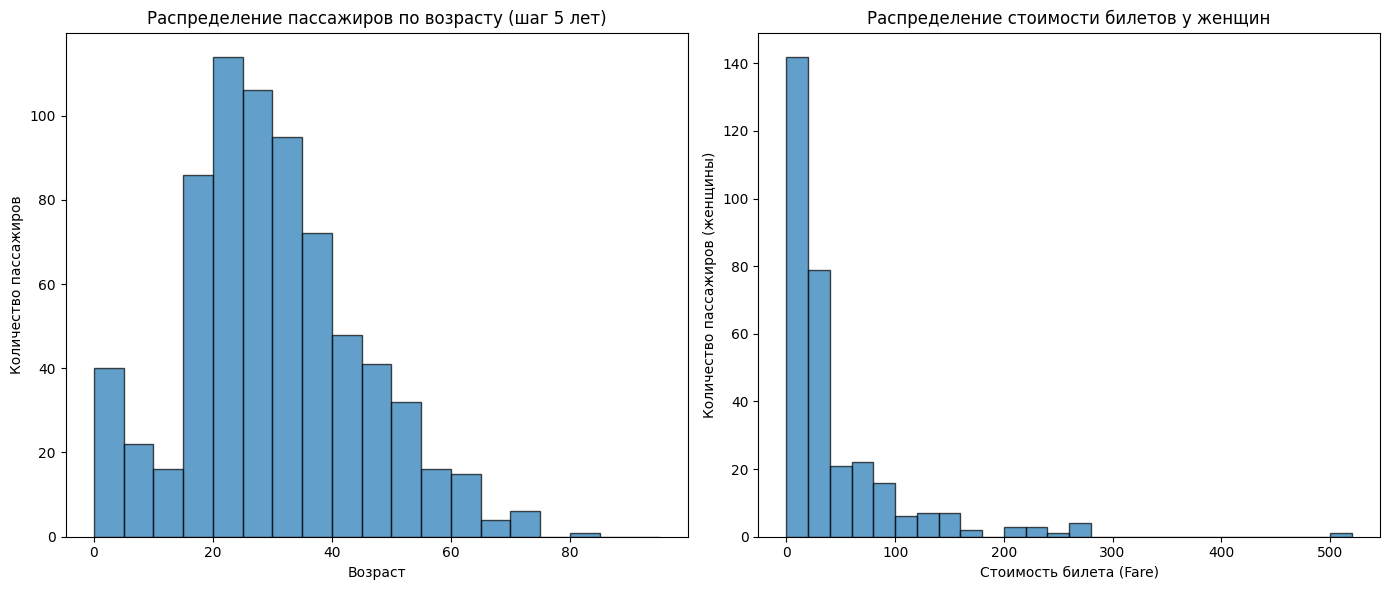

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

passengers = pd.read_csv('titanic.csv', index_col='PassengerId')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма распределения по возрасту (интервал 5 лет)
age_bins = range(0, 100, 5)
axes[0].hist(passengers['Age'].dropna(), bins=age_bins, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Распределение пассажиров по возрасту (шаг 5 лет)')

# Гистограмма стоимости билетов для женщин
females = passengers[passengers['Sex'] == 'female']
fare_bins = np.arange(0, females['Fare'].max() + 20, 20)  # шаг 20
axes[1].hist(females['Fare'].dropna(), bins=fare_bins, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Стоимость билета (Fare)')
axes[1].set_ylabel('Количество пассажиров (женщины)')
axes[1].set_title('Распределение стоимости билетов у женщин')

plt.tight_layout()
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

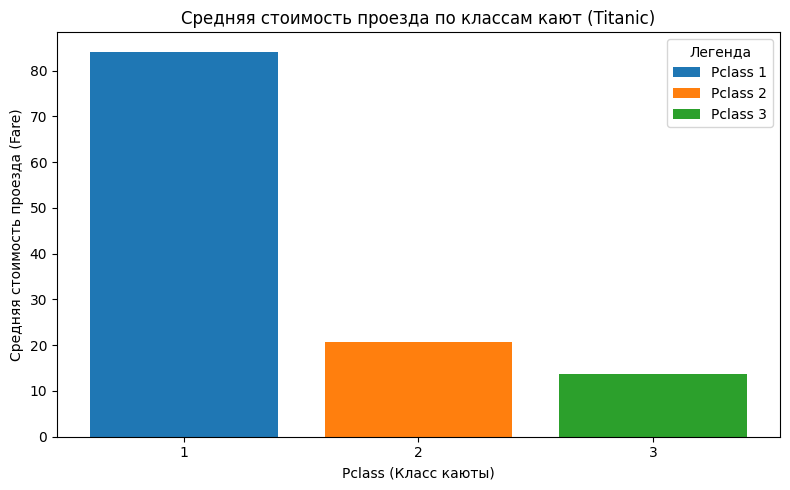

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Группировка по классу и вычисление средней платы
mean_fare = df.groupby("Pclass", observed=True)["Fare"].mean().sort_index()

# Настройка фигуры
fig, ax = plt.subplots(figsize=(8, 5))

# Вертикальная столбчатая диаграмма
bars = ax.bar(mean_fare.index.astype(str), mean_fare.values, color=["#1f77b4", "#ff7f0e", "#2ca02c"], label = ["Pclass 1", "Pclass 2", "Pclass 3"])

# Подписи осей, заголовок и легенда
ax.set_xlabel("Pclass (Класс каюты)")
ax.set_ylabel("Средняя стоимость проезда (Fare)")
ax.set_title("Средняя стоимость проезда по классам кают (Titanic)")
# Сделаем легенду, объясняющую цвета — создадим пользовательские элементы
ax.legend(handles=legend_elements, title="Легенда")

plt.tight_layout()
plt.show()


Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

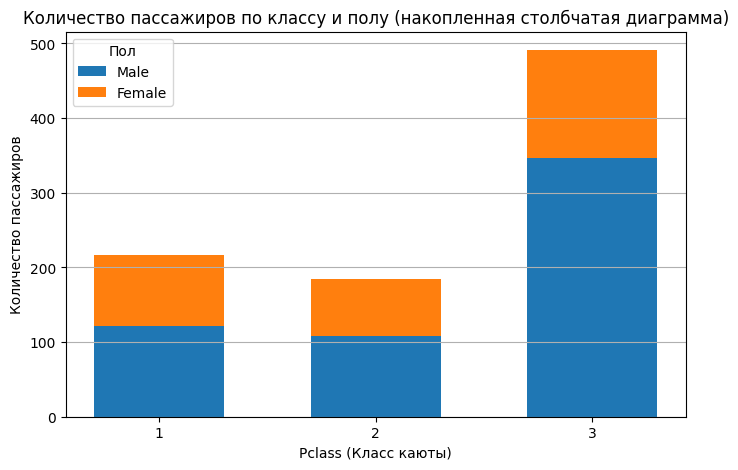

In [78]:
# Подготовка данных: количество пассажиров по Pclass и Sex
pivot = df.pivot_table(index='Pclass', columns='Sex', values='PassengerId', aggfunc='count', fill_value=0)

# Если в данных есть NaN или другие категории пола, оставим только 'male' и 'female' в предсказуемом порядке
sex_order = [s for s in ['male', 'female'] if s in pivot.columns]
pivot = pivot[sex_order]

# Параметры для построения
x = pivot.index.astype(str)          # метки классов как строки
width = 0.6                          # ширина столбца

# Построение вертикального накопленного столбчатого графика
fig, ax = plt.subplots(figsize=(8, 5))
bottom = None
for sex in sex_order:
    counts = pivot[sex].values
    ax.bar(x, counts, width, bottom=bottom, label=sex.capitalize())
    if bottom is None:
        bottom = counts.copy()
    else:
        bottom = bottom + counts

# Подписи, легенда, заголовок
ax.set_xlabel('Pclass (Класс каюты)')
ax.set_ylabel('Количество пассажиров')
ax.set_title('Количество пассажиров по классу и полу (накопленная столбчатая диаграмма)')
ax.legend(title='Пол')

ax.yaxis.grid()
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

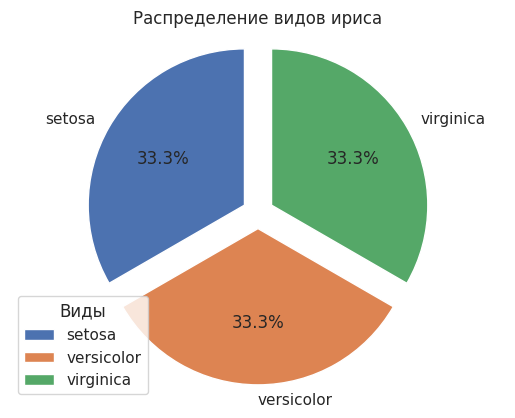

In [87]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
labels = iris.target_names
counts = [sum(iris.target == i) for i in range(len(labels))]
explode = [0.1 if c == max(counts) else 0 for c in counts]

plt.figure()
plt.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Распределение видов ириса')
plt.legend(labels, title='Виды', loc='best')
plt.axis('equal')
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

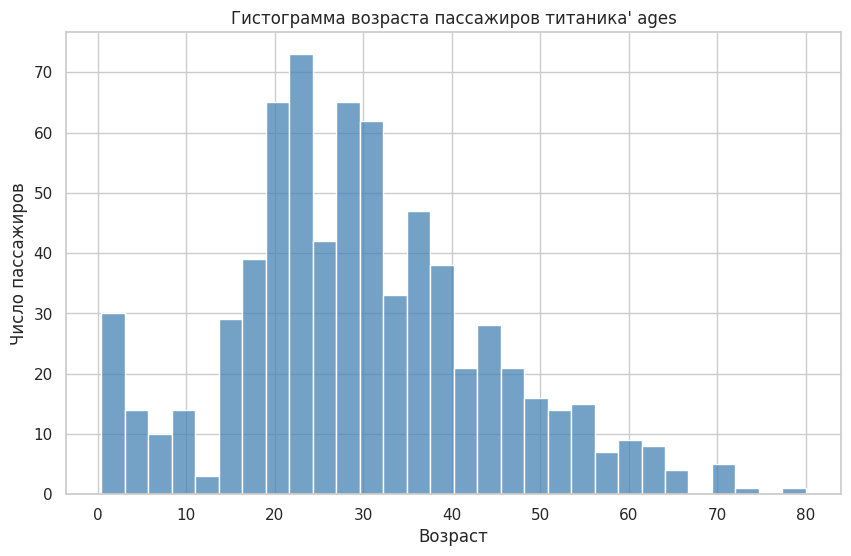

In [86]:
import seaborn as sns

df = pd.read_csv('titanic.csv')
age = df['Age'].dropna()

# Построение гистограммы
plt.figure(figsize=(10,6))
sns.histplot(age, bins=30, kde=False, color='steelblue')
plt.xlabel('Возраст')
plt.ylabel('Число пассажиров')
plt.title('Гистограмма возраста пассажиров титаника\' ages')
plt.show()


## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.